# Data together with Wonder Week data

## Import stuff

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load data

bt = baby tracker & ww = wonder week

In [2]:
bt_data = pd.read_csv('./day_sleep_feed_diaper.csv')

In [3]:
ww_data = pd.read_csv('./wonder_week_data.csv')

## Fix the data

In [13]:
# merge into one data frame
data = bt_data.merge(ww_data, left_on='Date', right_on='date')
data

,Date,Duration_sleep,Times_sleep,Duration_feed,Times_feed,Times_diaper,date,status
0,2018-06-18,837,6,89,12,9,2018-06-18,0
1,2018-06-19,956,6,74,10,10,2018-06-19,0
2,2018-06-20,975,7,67,12,6,2018-06-20,0
3,2018-06-21,894,6,83,13,9,2018-06-21,0
4,2018-06-22,895,6,77,14,8,2018-06-22,0
5,2018-06-23,836,8,85,14,9,2018-06-23,0
6,2018-06-24,1016,6,80,14,7,2018-06-24,0
7,2018-06-25,976,7,97,14,9,2018-06-25,0
8,2018-06-26,897,9,107,15,7,2018-06-26,0
9,2018-06-27,1033,8,117,13,8,2018-06-27,0


In [15]:
# drop column that we do not need
data = data.drop(['date'], axis=1)
data.head(3)

,Date,Duration_sleep,Times_sleep,Duration_feed,Times_feed,Times_diaper,status
0,2018-06-18,837,6,89,12,9,0
1,2018-06-19,956,6,74,10,10,0
2,2018-06-20,975,7,67,12,6,0


STATUS:
0 = ok,
1 = bad,
2 = happy,
3 = worse

In [ ]:
# Look at correlations both in graph and on heatmaps etc...

### Heat map duration and ww

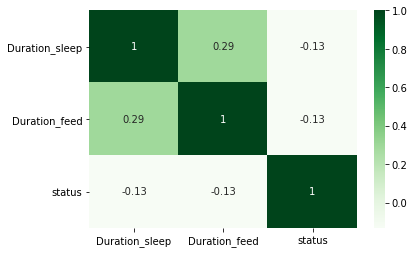

In [17]:
sns.heatmap(data[['Duration_sleep','Duration_feed', 'status']].corr(), annot = True, cmap="Greens")

### Heat map times and ww

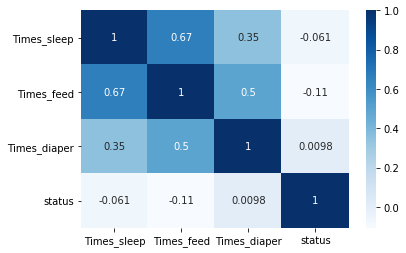

In [18]:
sns.heatmap(data[['Times_sleep','Times_feed', 'Times_diaper', 'status']].corr(), annot = True, cmap="Blues")

There do not seem to be any correlation btw status and the other variables. 

### Graphical trend (duration sleep and status)

We have to work a little bit on the status to change the number 0-3 in the status so that we can use it visually.

In [ ]:
# plt.plot(day_sleep_feed_diaper[['Duration_sleep', 'status']])